In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
X = np.array([[1,2],[2,7],[4,3],[5,5],[4,12],[11,13]])
centers = np.array([[1,2],[2,4]])

In [61]:
#Hàm tính khoảng cách từ tọa độ tâm đến các điểm
def distance(X,centers):
  #Tạo ma trận không để tính khoảng cách
  d = np.zeros(shape=(X.shape[0], centers.shape[0]))
  for j in range(centers.shape[0]):
    for i in range(centers.shape[1]):
      # Tính tổng các bình phương của hiệu từ tâm đến các phần tử của X
      d[:,j]=d[:,j]+(X[:,i]-centers[j,i])**2
      return np.sqrt(d)

#Xác định tâm có tọa độ gần điểm nhất
def get_labels(X,centers):
  temp = distance(X,centers)
  return np.argmin(temp,axis=1)

#Biểu diễn tâm và các điểm ra đồ thị
def present(X,label,n):
  make_color = ['r','g','b','b']
  for i in range(n):
    data = X[i==label,:]
    plt.scatter(data[:,0],data[:,1],marker='o', color=make_color[i])
    plt.scatter(centers[i,0],centers[i,1],marker='s',color=make_color[i])

#Cập nhật lại tâm mới
def update_centers(X,label,n):
  centers=np.zeros((n,X.shape[1]))
  for k in range(n):
    #Nhóm các điểm cùng tâm lại với nhau
    Xk = X[label==k,:]
    #Tính trung bình
    centers[k,:]=np.mean(Xk,axis=0)
  return centers

def Kmean(X,centers):
  while(1):
    label = get_labels(X,centers)
    present(X,label,2)
    centers_new = update_centers(X,label,2)
    if np.array_equal(centers,centers_new):
      return label,centers_new
    else:
      centers = centers_new

array([[ 1,  2,  0],
       [ 2,  7,  1],
       [ 4,  3,  1],
       [ 5,  5,  1],
       [ 4, 12,  1],
       [11, 13,  1]])

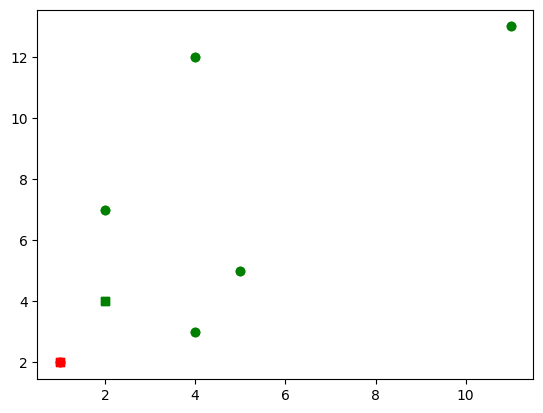

In [62]:
label,centers=Kmean(X,centers)
label=label.reshape(-1,1)
X=np.hstack((X,label))
X

In [63]:
#Lưu ma trận xuống file csv
np.savetxt('matrix.csv',X,delimiter=',',fmt='%f')
#fmt='%f' dùng để định dạng kiểu kí tự là số thực

#Tải file xuống từ gg colab
from google.colab import files
files.download('matrix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>